# Exercises

## Exercise 1
---
Determine the effect of stimulus sequence duration on RF estimates. To do this, repeat the above steps for different durations (5 s, 10 s, 20 s, 40 s, 80 s, 160 s, 320 s, 640 s). Compute the Pearson correlation between true and estimated RFs for each duration to quantify the accuracy of the estimator. The Pearson correlation $\mathrm{cc}$ is defined as
$$
\mathrm{cc} = \frac{\mathbf{k}_\mathrm{true}^T \hat{\mathbf{k}}}{\lVert \mathbf{k}_\mathrm{true} \rVert \lVert \hat{\mathbf{k}} \rVert}
$$
where $\lVert \cdot \rVert$ is the L2-norm (vector length).
As the response generation process is stochastic, compute the average correlation across 10 realizations for the same duration and plot the average correlation as a function of duration. How is the recording duration related to the ability to recover the true RF? 

Duration: 5 s, Pearson Correlation: 0.223
Duration: 10 s, Pearson Correlation: 0.443
Duration: 20 s, Pearson Correlation: 0.381
Duration: 40 s, Pearson Correlation: 0.773
Duration: 80 s, Pearson Correlation: 0.916
Duration: 160 s, Pearson Correlation: 0.957
Duration: 320 s, Pearson Correlation: 0.982
Duration: 640 s, Pearson Correlation: 0.992


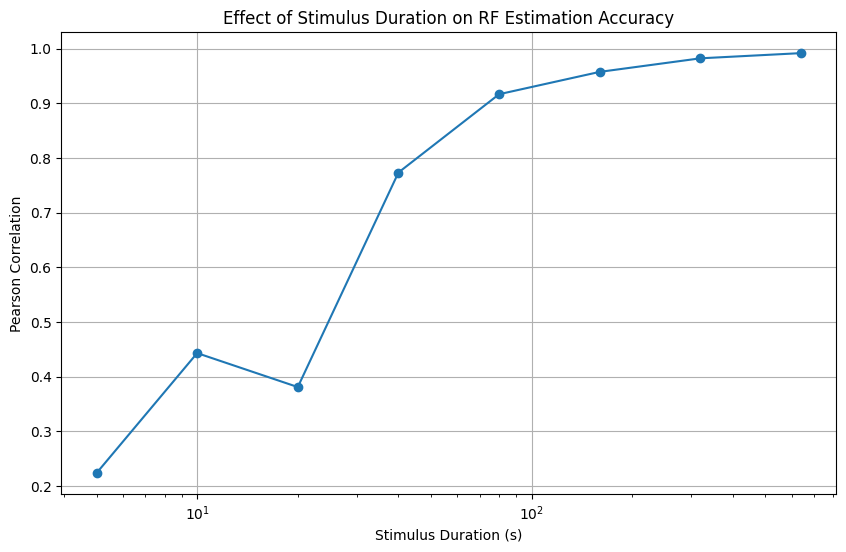

In [10]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

# Append the path to the utilities module
sys.path.append(os.path.abspath("code"))

# Import all functions from utilities
from utilities import (
    create_receptive_field,
    create_gaussian_stimuli,
    f_identity,
    generate_data_linear,
    generate_inhomogeneous_poisson_spikes,
    generate_data_poisson
)

def estimate_rf(S_flat, rate, rf_size):
    K_hat = np.linalg.pinv(S_flat.T @ S_flat) @ (S_flat.T @ rate)
    return K_hat[:-1].reshape(rf_size)

def pearson_correlation(k_true, k_est):
    return np.dot(k_true.ravel(), k_est.ravel()) / (np.linalg.norm(k_true) * np.linalg.norm(k_est))

# Parameters
rf_size = (15, 15)
durations = [5, 10, 20, 40, 80, 160, 320, 640]
dt = 0.1
noise_variance = 4
offset = 2.0

correlations = []

# Perform the analysis for each duration
for duration in durations:
    K_true, S, ks, rate = generate_data_linear(
        rf_size=rf_size,
        f_nonlin=f_identity,
        duration=duration,
        dt=dt,
        offset=offset,
        noise_variance=noise_variance
    )

    # Flatten the stimulus matrix
    S_flat = S

    # Estimate RF
    K_est = estimate_rf(S_flat, rate, rf_size)

    # Compute Pearson correlation
    cc = pearson_correlation(K_true, K_est)
    correlations.append(cc)

    # Print results for each duration
    print(f"Duration: {duration} s, Pearson Correlation: {cc:.3f}")

# Plot Pearson correlation vs. duration
plt.figure(figsize=(10, 6))
plt.plot(durations, correlations, marker='o')
plt.xscale('log')
plt.xlabel('Stimulus Duration (s)')
plt.ylabel('Pearson Correlation')
plt.title('Effect of Stimulus Duration on RF Estimation Accuracy')
plt.grid(True)
plt.show()


Duration: 5 s, Average Pearson Correlation: 0.293
Duration: 10 s, Average Pearson Correlation: 0.429
Duration: 20 s, Average Pearson Correlation: 0.375
Duration: 40 s, Average Pearson Correlation: 0.777
Duration: 80 s, Average Pearson Correlation: 0.910
Duration: 160 s, Average Pearson Correlation: 0.962
Duration: 320 s, Average Pearson Correlation: 0.982
Duration: 640 s, Average Pearson Correlation: 0.991


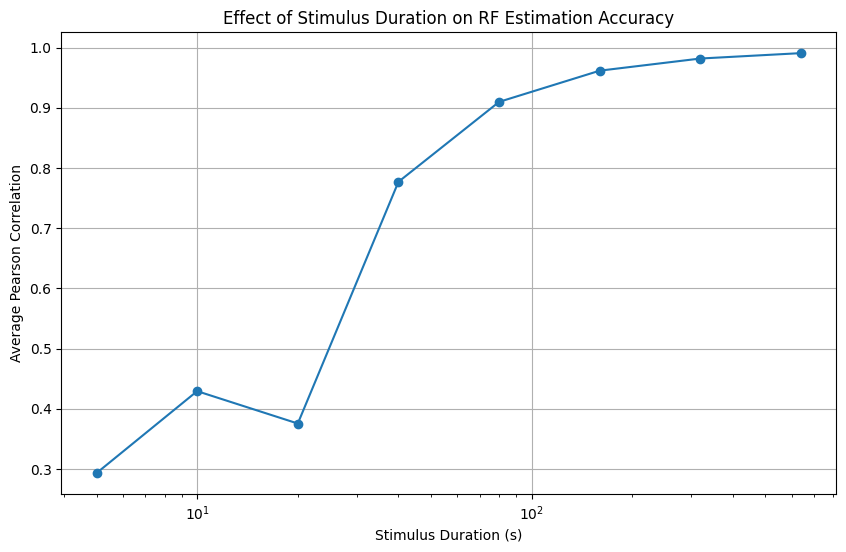

In [11]:
# Parameters
rf_size = (15, 15)
durations = [5, 10, 20, 40, 80, 160, 320, 640]
dt = 0.1
noise_variance = 4
offset = 2.0
num_realizations = 10

correlations = []

# Perform the analysis for each duration
for duration in durations:
    duration_correlations = []

    for _ in range(num_realizations):
        K_true, S, ks, rate = generate_data_linear(
            rf_size=rf_size,
            f_nonlin=f_identity,
            duration=duration,
            dt=dt,
            offset=offset,
            noise_variance=noise_variance
        )

        # Flatten the stimulus matrix
        S_flat = S

        # Estimate RF
        K_est = estimate_rf(S_flat, rate, rf_size)

        # Compute Pearson correlation
        cc = pearson_correlation(K_true, K_est)
        duration_correlations.append(cc)

    # Compute average correlation for the current duration
    avg_correlation = np.mean(duration_correlations)
    correlations.append(avg_correlation)

    # Print results for each duration
    print(f"Duration: {duration} s, Average Pearson Correlation: {avg_correlation:.3f}")

# Plot Pearson correlation vs. duration
plt.figure(figsize=(10, 6))
plt.plot(durations, correlations, marker='o')
plt.xscale('log')
plt.xlabel('Stimulus Duration (s)')
plt.ylabel('Average Pearson Correlation')
plt.title('Effect of Stimulus Duration on RF Estimation Accuracy')
plt.grid(True)
plt.show()


The results demonstrate that recording duration impacts the ability to recover the true RF. For shorter durations of 5, 10, and 20 seconds, Pearson correlation values are low, indicating poor RF recovery likely due to insufficient data. As the duration increases to 40 and 80 seconds, the Pearson correlation improves substantially. This indicates that more data enhances the accuracy of RF estimation. For longer durations of 160, 320, and 640 seconds, the correlations are very high, at 0.962, 0.982, and 0.991, respectively, demonstrating excellent RF recovery.

Thus, the relationship shows that longer recording durations provide more data, improving RF estimation accuracy. However, the benefit diminishes with very long durations, as the rate of improvement decreases. Averaging correlations over multiple realizations confirms this trend, reflecting the stochastic nature of the response generation.

## Exercise 2
---
Determine the effect of response noise ($\sigma^2$) on RF estimates. Try different value for the noise variance in the simulations, e.g., 0, 2, 4, 6, 8, and 10 for a duration of 100 s. As in the previous excercise, repeatedly estimate RF parameters for each condition (10 times) but this time also plot the standard deviation of the correlations across the different runs for each condition.

## Exercise 3
---
Look at the analytical derivation of the log-likelihood for the poisson GLM.
Which of the terms are required for maximizing the likelihood with respect to $\mathbf{k}$ and which terms can be ignored? **Note:** due to the independence of spikes in the different bins, the likelihood can be written as $P(R | S, \mathbf{k}) = \prod_t^T P(r_t | \mathbf{s}_t, \mathbf{k})$. The log turns the product into a sum which makes life much easier. 




## Exercise 4
---
Explore the effect of the data duration and the firing rate on the goodness of fit of the Poisson GLM.

A - Generate data with durations of 10,20,50,100 and 200 seconds. Fit the model on each dataset and plot the fitted parameters.
Use the pearson correlation as a proxy of the goodness of fit, and plot it as a function of the duration of the data.

B - Fix the duration to 100s, and change the average firing rate of the simulation. How does the fit perform for different firing rates? 